<div class="alert alert-block alert-success">
    <h1 align="center">Machine Learning in Python</h1>
    <h3 align="center">K-means</h3>
    <h4 align="center"><a href="https://www.linkedin.com/public-profile/settings?trk=d_flagship3_profile_self_view_public_profile&lipi=urn%3Ali%3Apage%3Ad_flagship3_profile_self_edit_top_card%3BhFw1W2M%2FTMCAYZp6pzKt1Q%3D%3D">Seyed Mohammad Sajadi</a></h4>
</div>

# Topics:

- [ ] What is Unsupervised learning
- [ ] What is K-means
- [ ] How does K-means work?
- [ ] Decision Tree in Code

## Supervised vs Unsupervised

<img src = "https://lh6.googleusercontent.com/PSBQZz-ndc-SnDmfMJU0ap-yV6E5W8dhrBQ01qojCBsOH6KDPyuP89xwC7xt7MkK37S1Isrin0aKW951q_rZVG-Jf2C2SbfHtPSM-8KOQRCTSoY8IncTbJFIFOVCO1-pC3xt1B-t" width=75%>

<img src = "https://lh3.googleusercontent.com/DS4BHTkXT_9FzxuOd67PNjJT-o87kdtvP42wq_JUzQz8oWhzOOxWKu0CAkTSzBzyLKrYNWAF8dAY6FUSgjLJFBBrMjHz_cdk9-i0QhAOnIdo8Nq3192BdGxlEUwRRpCzkp_iBiIK" width=75%>

<img src = "https://cdn-images-1.medium.com/max/960/1*31iqrQyCqIuuGPLUK_BjMQ.png" width=75%>

<img src = "https://miro.medium.com/max/2560/0*p3zNp9D8YFmX32am.jpg" width=75%>

## K-means Animation

http://shabal.in/visuals/kmeans/1.html

## Importing the libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Importing the dataset

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
X = dataset.iloc[:, [3, 4]].values

In [3]:
dataset

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


## Using K-means in Action

In [5]:
from sklearn.cluster import KMeans

* Within Cluster Sum of Squares (WCSS):

WCSS is the sum of squared distance between each point and the centroid in a cluster. When we plot the WCSS with the K value, the plot looks like an Elbow. As the number of clusters increases, the WCSS value will start to decrease

In [6]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    #k-means++ is an algorithm for choosing the initial values (or "seeds") for the k-means clustering algorithm.
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

In [7]:
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37233.81451071002,
 30259.657207285458,
 25011.839349156595,
 21850.16528258562,
 19672.07284901432]

## How to use K in K-means? (Elbow Curve)

<img src = "6.jpg" width=75%>

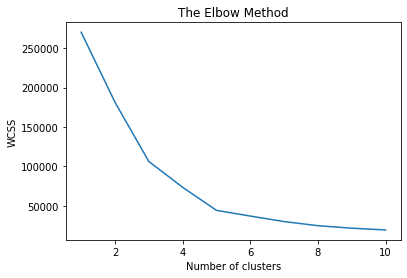

In [8]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

In [10]:
kmeans.cluster_centers_

array([[44.15447154, 49.82926829],
       [87.        , 18.63157895],
       [86.53846154, 82.12820513]])

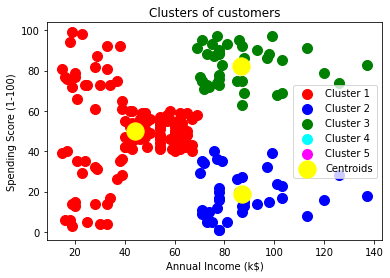

In [11]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()